Project Name: Electric Car prediction

Author: A. Nikfarjam

Discription: In this project I am using KNeighborsRegressor Model and SciKit Learn to predict the population of electric cars.

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

The Data set comes from:https://catalog.data.gov/dataset/electric-vehicle-population-size-history-by-county

In [107]:
#data prep and importing libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd 

# Load the data
data = pd.read_csv("Electric_Vehicle_Population_Size_History_By_County.csv")
print("df size:",data.shape)
#lets get some ingfo about our data
data.info()



df size: (20493, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20493 entries, 0 to 20492
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20493 non-null  object 
 1   County                                    20408 non-null  object 
 2   State                                     20408 non-null  object 
 3   Vehicle Primary Use                       20493 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20493 non-null  int64  
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20493 non-null  int64  
 6   Electric Vehicle (EV) Total               20493 non-null  int64  
 7   Non-Electric Vehicle Total                20493 non-null  int64  
 8   Total Vehicles                            20493 non-null  int64  
 9   Percent Electric Vehicles                 20493 non-null  float64
dtypes: float64(1)

now i know what columns are in our data set and what data type there are

to prep the data and do analysis I am thinking about and aggregate the Plug-In Hybrid Electric Vehicles (PHEVs) and Electric Vehicle (EV) Total and  Non-Electric Vehicle Total  and Total vehicles columns


In [108]:
data = data.groupby('Date').agg({
    col: 'sum' for col in data.columns[4:9]
}).reset_index()
print("df size:",data.shape)
data.head(20)

df size: (85, 6)


,Date,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles
0,April 30 2017,15791,8120,23911,5930546,5954457
1,April 30 2018,20505,11290,31795,5999728,6031523
2,April 30 2019,30465,14947,45412,6101079,6146491
3,April 30 2020,40628,17111,57739,6145333,6203072
4,April 30 2021,51645,19822,71467,6203668,6275135
5,April 30 2022,70751,24470,95221,6132307,6227528
6,April 30 2023,99813,30298,130111,6030125,6160236
7,August 31 2017,17273,8967,26240,5941718,5967958
8,August 31 2018,23078,12712,35790,6047909,6083699
9,August 31 2019,33667,15882,49549,6146412,6195961


As we can see in the first pary it seams like, out data frame doesnt have non filled data

1- In this part I am going to Identify the features and targey variables
2- we need to split our data frame for training and testing
3- then run the the module on out test data set

In [109]:
# Split the features and target variable
cp_df = data.copy()
X = cp_df.drop('Electric Vehicle (EV) Total', axis=1)
y = cp_df['Electric Vehicle (EV) Total']  

# Dummy encoding for categorical variables on combined dataset
X_encoded = pd.get_dummies(X, columns=['Date'])
X_encoded.head()


,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Non-Electric Vehicle Total,Total Vehicles,Date_April 30 2017,Date_April 30 2018,Date_April 30 2019,Date_April 30 2020,Date_April 30 2021,Date_April 30 2022,...,Date_October 31 2021,Date_October 31 2022,Date_October 31 2023,Date_September 30 2017,Date_September 30 2018,Date_September 30 2019,Date_September 30 2020,Date_September 30 2021,Date_September 30 2022,Date_September 30 2023
0,15791,8120,5930546,5954457,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,20505,11290,5999728,6031523,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,30465,14947,6101079,6146491,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,40628,17111,6145333,6203072,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,51645,19822,6203668,6275135,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [110]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Instantiate the KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=2)

# Fit the model
reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = reg.predict(X_test)

#lets see out perdictions
print("This is the 10 examples of perdictions made during trainings",[x for x in y_pred if x > 0][:10])
print("This is the 10 examples of perdictions made during testing",[x for x in y_test if x > 0][:10])

This is the 10 examples of perdictions made during trainings [24114.0, 25126.5, 80999.5, 29168.5, 104084.5, 80999.5, 58666.5, 80999.5, 76140.0, 53086.0]
This is the 10 examples of perdictions made during testing [26867, 23911, 84855, 30183, 104592, 80687, 60331, 86626, 71467, 52991]


this a pick at Xtest

In [111]:
X_test.head()

,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Non-Electric Vehicle Total,Total Vehicles,Date_April 30 2017,Date_April 30 2018,Date_April 30 2019,Date_April 30 2020,Date_April 30 2021,Date_April 30 2022,...,Date_October 31 2021,Date_October 31 2022,Date_October 31 2023,Date_September 30 2017,Date_September 30 2018,Date_September 30 2019,Date_September 30 2020,Date_September 30 2021,Date_September 30 2022,Date_September 30 2023
78,17676,9191,5950065,5976932,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
0,15791,8120,5930546,5954457,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
68,62093,22762,6185197,6270052,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,19563,10620,5981240,6011423,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,78398,26194,6092753,6197345,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [112]:
#add the predicrions column in to the data frame
X_test['Electric Vehicle (EV) Total']=y_test
predicted_ev = []#bater electric vehicles
dates = []
for date in X_test.columns[4:]:
    true_row = X_test[date].idxmax()
    predicted_ev.append(X_test.loc[true_row, 'Electric Vehicle (EV) Total'])
    dates.append(date)
print(dates[:10])
print(predicted_ev[:10])

    

['Date_April 30 2017', 'Date_April 30 2018', 'Date_April 30 2019', 'Date_April 30 2020', 'Date_April 30 2021', 'Date_April 30 2022', 'Date_April 30 2023', 'Date_August 31 2017', 'Date_August 31 2018', 'Date_August 31 2019']
[23911, 26867, 26867, 26867, 71467, 26867, 26867, 26867, 26867, 26867]


Now we construct  a data frame from the lists we created

In [113]:
prd_df = pd.DataFrame({'Date': dates,
                       'Predicted_EV_counts':predicted_ev
                       })
print(prd_df.shape)
prd_df.head()

(86, 2)


,Date,Predicted_EV_counts
0,Date_April 30 2017,23911
1,Date_April 30 2018,26867
2,Date_April 30 2019,26867
3,Date_April 30 2020,26867
4,Date_April 30 2021,71467


The last step is to merge this data frame with the original one

to make this happened i need to drop "Date_" part from the values of the Date column

In [114]:
prd_df['Date'] = prd_df['Date'].str.split("_").str[1]

# Merging the dataframes
merged_df = pd.merge(data, prd_df, on='Date', how='left')

# Fill NaN values with 0
merged_df.fillna(0, inplace=True)

# Displaying the first few rows of the merged dataframe
print(merged_df.shape)
merged_df.head()

(85, 7)


,Date,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Predicted_EV_counts
0,April 30 2017,15791,8120,23911,5930546,5954457,23911
1,April 30 2018,20505,11290,31795,5999728,6031523,26867
2,April 30 2019,30465,14947,45412,6101079,6146491,26867
3,April 30 2020,40628,17111,57739,6145333,6203072,26867
4,April 30 2021,51645,19822,71467,6203668,6275135,71467


Now the we linked everything lets check the accuracy

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 35 to 28
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      85 non-null     datetime64[ns]
 1   Battery Electric Vehicles (BEVs)          85 non-null     int64         
 2   Plug-In Hybrid Electric Vehicles (PHEVs)  85 non-null     int64         
 3   Electric Vehicle (EV) Total               85 non-null     int64         
 4   Non-Electric Vehicle Total                85 non-null     int64         
 5   Total Vehicles                            85 non-null     int64         
 6   Predicted_EV_counts                       85 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 5.3 KB


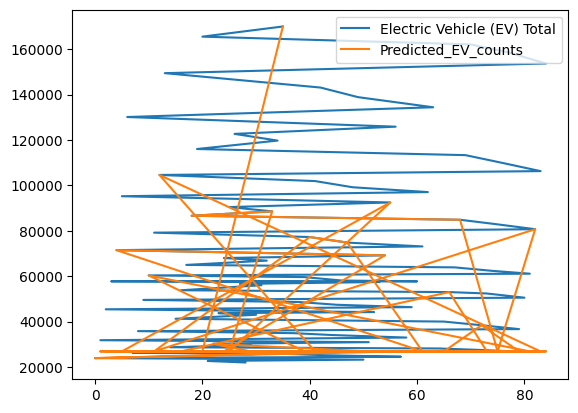

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
merged_df=merged_df.sort_values(by='Date', ascending=False)
merged_df.info()
#i need to sort based on date and to do that i want to convert the to date object
merged_df['Date']=pd.to_datetime(merged_df['Date'])
merged_df=merged_df.sort_values(by='Date', ascending=False)
#sns.lineplot(merged_df[['Date','Electric Vehicle (EV) Total', 'Predicted_EV_counts']], x='Date')
lines = merged_df[['Electric Vehicle (EV) Total', 'Predicted_EV_counts']].iloc[:,:20].plot.line()
#plt.plot(merged_df['Electric Vehicle (EV) Total','Predicted_EV_counts'],merged_df['date'])